# Elementary Cellular Automata (ECA)

In [1]:
using Plots;
theme(:juno)

bool(x::Int) = (x!=0); # helper function since Julia doesn't like to use ints as bools
int(x::Float64) = floor(Int, x); # converts floats to int8
int(x,y,z) = (x<<2 | y<<1 | z); # converts 3 values into the integer represented by their bitstring

function eca(N, it, rule)
    mask = 1
    world = zeros(Int8, it, N)  # Create grid
    world[1,int(N/2)] = 1;      # start with a single one in the middle        
    
    # main update loop
    for i in 1:size(world, 1)-1
        for j in 1:size(world, 2)
            b = mod1((j-1+N), N)
            e = mod1((j+1+N), N)
            if b < e
                val = int(world[i,b:e]...)
            else
                val = int(world[i,b], world[i,j], world[i,e])
            end
            if bool(rule & (mask<<val))
                world[i+1, j] = 1
            end
        end
    end
    return world;
end

eca (generic function with 1 method)

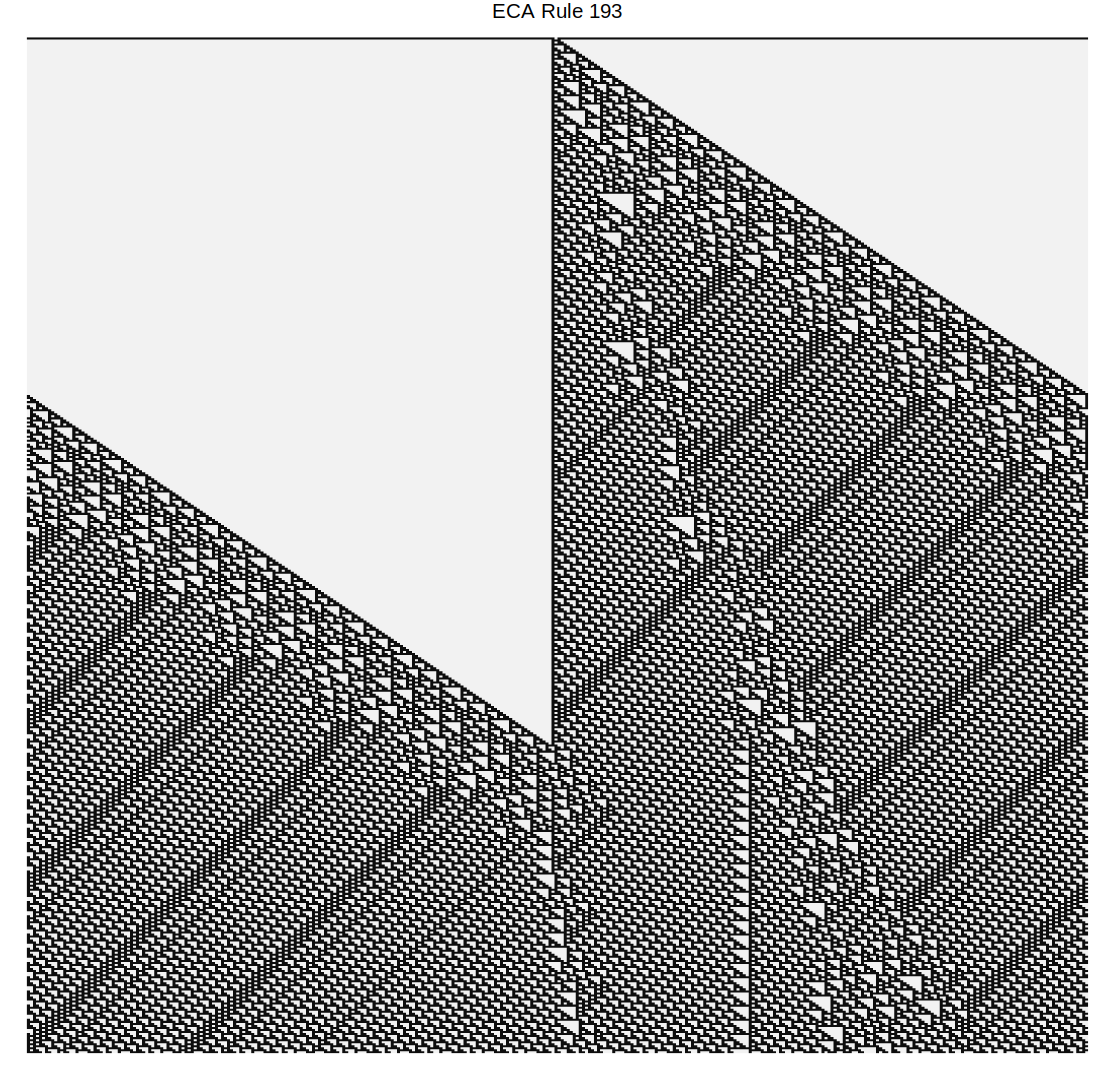

In [77]:
automaton = eca(350, 500, 193)
heatmap(1:size(automaton,2),
    1:size(automaton,1),
    reverse(automaton, dims=1),
    c = :grays,
    axis=([], false),
    legend=false,
    title="ECA Rule 193",
    size=(1100, 1080))

## Generalizing a Bit

There is nothing stopping us from using more than 3 parents (except maybe laziness). To enable this functionality we just have to alter the eca function a bit. Namely, we adjust one of our int() functions 

In [1]:
using Plots;

In [66]:
bool(x::Int) = (x!=0); # helper function since Julia doesn't like to use ints as bools
int(x::Float64) = floor(Int, x); # converts floats to int8
# below is our updated function
int(xs::Array{Int8,1}) = sum([x<<(length(xs)-i) for (i,x) in enumerate(xs)])

function eca(N::Int, it::Int, rule::Int, k::Int=1)
    mask = 1
    world = zeros(Int8, it, N)  # Create grid
    world[1,int(N/2)] = 1;      # start with a single one in the middle        
    
    # main update loop
    for i in 1:size(world, 1)-1
        for j in 1:size(world, 2)
            b = mod1((j-k+N), N)
            e = mod1((j+k+N), N)
            if b < e
                val = int(world[i,b:e])
            else
                val = int(vcat(world[i, b:N], world[i, 1:e]))
                if bool(rule & (mask<<val))
                end
            end
            if bool(rule & (mask<<val))
                world[i+1, j] = 1
            end
        end
    end
    return world;
end

eca (generic function with 2 methods)

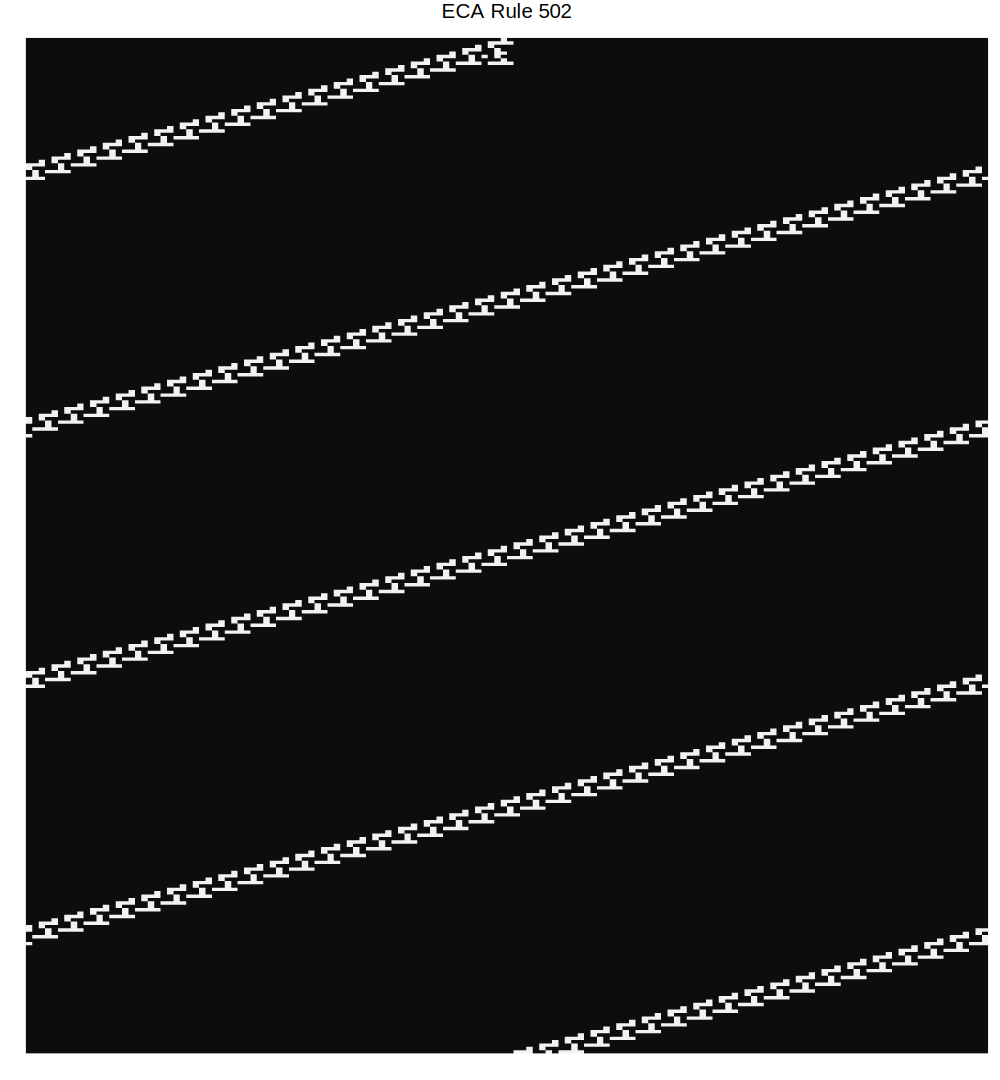

In [74]:
r = 502
automaton = eca(150, 300, r, 2)
heatmap(1:size(automaton,2),
    1:size(automaton,1),
    reverse(automaton, dims=1),
    c = :grays,
    axis=([], false),
    legend=false,
    title="ECA Rule $r",
    size=(1000, 1080))

# 3-Color Automata

An interesting extension of ECA involves automata with more than two possible states, e.g. each cell of the automata could take on a value in $\{0, 1, 2\}$ instad of just $\{0,1\}$. This concept can be extended to include k colors, with each rule being represented as an array of values in $[0,k-1]$ representing the base-k representation of the rule. Take, for example, the 3-color automata using rule 777 below (Wolfram, p60). Note that we are still using a parent window size of 3 here.

In [57]:
# first we need to convert the rule into base-3 notation
rule = 777;
rule_base3 = reverse([parse(Int8, c) for c in string(777, base=3)]); # maybe find a more elegant approach

Once we've done the conversion, the logic is very similar to the eca function.

In [58]:
it = 100;
N = 101

world = zeros(Int8, it, N)  # Create grid
world[1,int(N/2)] = 1;      # start with a single one in the middle        
    
# main update loop
for i in 1:size(world, 1)-1
    for j in 1:size(world, 2)
        b = mod1((j-1+N), N)
        e = mod1((j+1+N), N)
        if b < e
            val = sum(world[i,b:e]) #int(world[i,b:e]...)
        else
            val = sum([world[i,b], world[i,j], world[i,e]]) #int(world[i,b], world[i,j], world[i,e])
        end
        world[i+1, j] = rule_base3[val+1]
    end
end


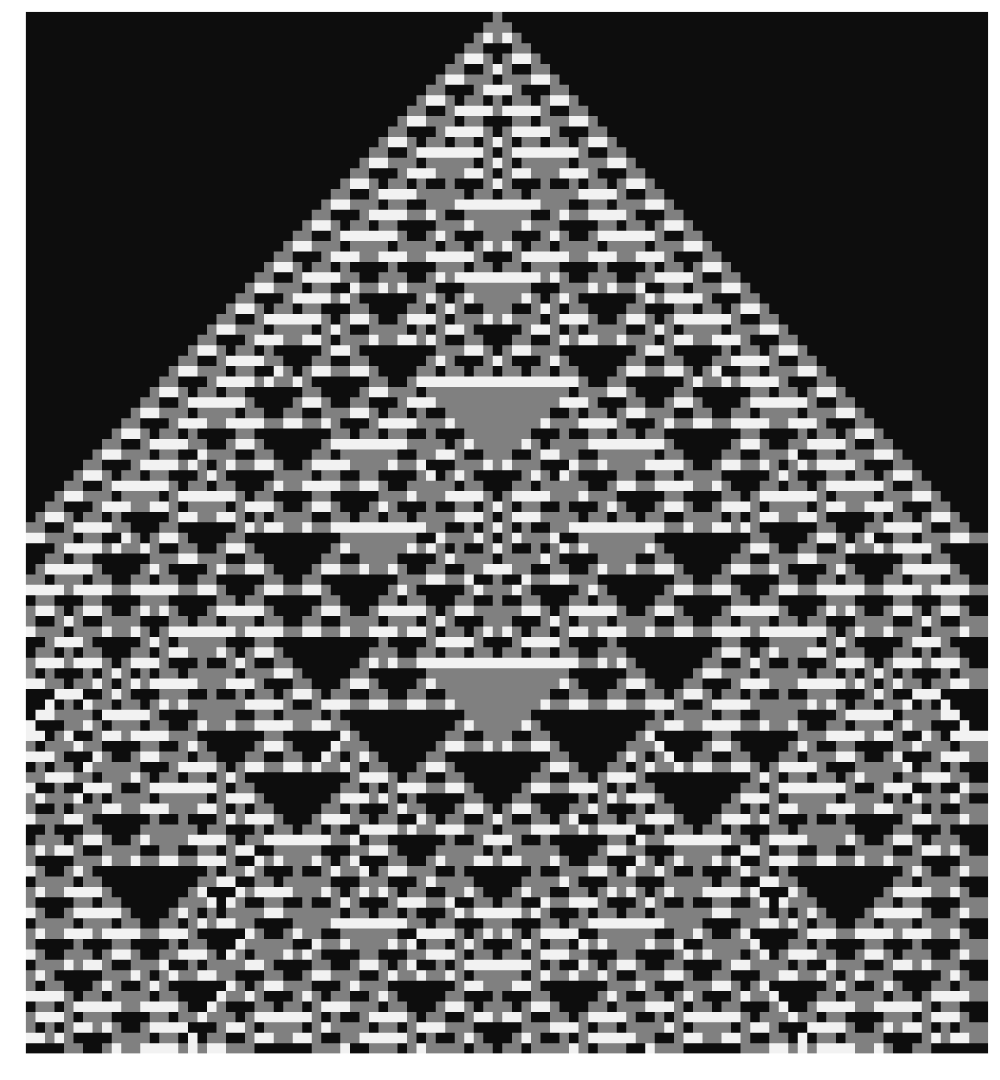

In [59]:
using ColorSchemes, Plots;
heatmap(1:size(world,2),
    1:size(world,1),
    reverse(world, dims=1),
    c = :grays,
    axis=([], false),
    legend=false,
    size=(1000, 1080))

So we will wrap this guy up in a handy dandy function

In [60]:
function k_color(N::Int, it::Int, rule::Int, k::Int=3)
    world = zeros(Int8, it, N)  # Create grid
    world[1,div(N,2)] = 1;      # start with a single one in the middle        
    rule_basek = reverse([parse(Int8, c) for c in string(rule, base=k)]) 
    
    # main update loop
    for i in 1:size(world, 1)-1
        for j in 1:size(world, 2)
            b = mod1((j-1+N), N)
            e = mod1((j+1+N), N)
            if b < e
                val = sum(world[i,b:e])
            else
                val = sum([world[i,b], world[i,j], world[i,e]])
            end
            world[i+1, j] = rule_basek[val+1]
        end
    end
    return 3 .- world; # broadcast subtraction to handle reversed colormap
end

k_color (generic function with 2 methods)

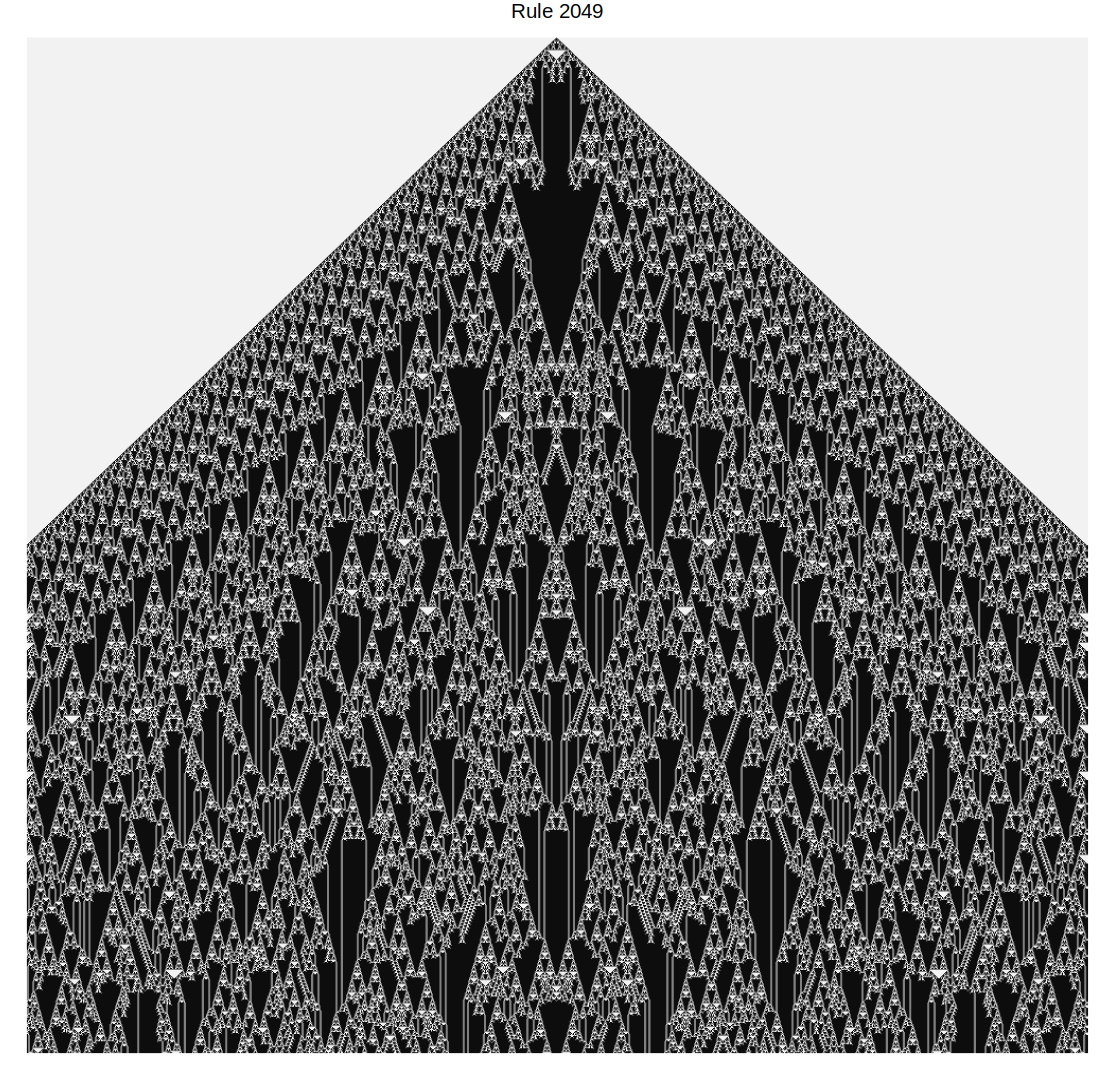

In [65]:
using ColorSchemes, Plots;
autamaton = k_color(1001, 1000, 2049);
heatmap(1:size(autamaton,2),
    1:size(autamaton,1),
    reverse(autamaton, dims=1),
    c = :grays,
    axis=([], false),
    legend=false,
    size=(1100, 1080),
    title="Rule 2049")

# Mobile Automata

